# Análisis de datos de encuesta 


## Objetivos
### General
Determinar las funcionalidades prioritarias, caracterizar los perfiles de usuario (público objetivo) y establecer los requisitos de usabilidad para justificar el desarrollo de un Sistema de Alerta Temprana para la permanencia estudiantil.


### Específicos

 Segmentar al personal encuestado en grupos con características y necesidades distintas, basándose en la combinación de sus niveles de comodidad digital, experiencia, métodos de documentación actuales y preferencias de herramientas. 

 Detectar patrones de comportamiento o actitudes que correlacionen con el rol principal o los años de experiencia, para comprender cómo estos factores influyen en la percepción del problema y la disposición a la solución.

 Determinar qué variables (ej. rol, años de experiencia, número de estudiantes en riesgo detectados, comodidad digital) influyen significativamente en la percepción de dificultad para identificar estudiantes en riesgo. 

 Analizar las interacciones entre las preferencias de notificaciones y las preocupaciones expresadas

 Establecer si existen asociaciones fuertes entre los tipos de datos que el personal considera más importantes para identificar el riesgo y las acciones de registro o reportes que desean en el sistema. (Por ejemplo, ¿quienes valoran la "asistencia" también priorizan los "reportes de absentismo"?).


## Preparación del Entorno e Importación de Librerías

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set_style("whitegrid") 
plt.rcParams['figure.dpi'] = 100 # 

### Carga del Dataset

In [38]:

print("Directorios en la ubicación actual:")
directories = os.listdir()
for directory in directories:
    print(directory)


folder = "encuestas"


print(f"\nArchivos disponibles en la carpeta '{folder}':")
try:
    survey_files = os.listdir(os.path.join(folder))
    if not survey_files:
        print(f"La carpeta '{folder}' está vacía. Asegúrate de que el archivo CSV esté allí.")
    else:
        for file_name in survey_files:
            print(file_name)
        
        
        file_to_load = survey_files[0]
        full_path = os.path.join(folder, file_to_load)
        print(f"\nArchivo seleccionado para cargar: {full_path}")

 
        respuestas = pd.read_csv(full_path)
        print("\nDataset cargado exitosamente. Primeras 5 filas:")
        print(respuestas.head())

except FileNotFoundError:
    print(f"Error: La carpeta '{folder}' no fue encontrada. Asegúrate de que exista y esté en la ruta correcta.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Directorios en la ubicación actual:
notebook_analisis.ipynb
encuestas
.venv
.git
notebook_eda.ipynb
.gitattributes

Archivos disponibles en la carpeta 'encuestas':
Encuesta 9no.csv

Archivo seleccionado para cargar: encuestas/Encuesta 9no.csv

Dataset cargado exitosamente. Primeras 5 filas:
                    Marca temporal  \
0  2025/05/20 12:10:20 p. m. GMT-6   
1  2025/05/20 12:26:06 p. m. GMT-6   
2  2025/05/20 12:47:58 p. m. GMT-6   
3   2025/05/20 5:38:39 p. m. GMT-6   
4   2025/05/20 6:06:39 p. m. GMT-6   

    ¿Cuál es su rol principal en la institución?  \
0  Personal de Apoyo (Pedagógico/Administrativo)   
1  Personal de Apoyo (Pedagógico/Administrativo)   
2  Personal de Apoyo (Pedagógico/Administrativo)   
3  Personal de Apoyo (Pedagógico/Administrativo)   
4  Personal de Apoyo (Pedagógico/Administrativo)   

  ¿A qué área o departamento pertenece principalmente?   \
0                                           Docencia      
1                                           Doce

In [39]:
respuestas.head()

,Marca temporal,¿Cuál es su rol principal en la institución?,¿A qué área o departamento pertenece principalmente?,¿Cuántos años de experiencia tiene trabajando en institutos académicos?,"Actualmente, ¿cómo identifica a los estudiantes que podrían estar en riesgo de no continuar sus estudios?","En una semana típica, ¿aproximadamente cuántos estudiantes presentan signos de rezago o problemas que ponen en riesgo su desempeño?",¿Qué tan difícil considera el proceso actual de identificar tempranamente a los estudiantes en riesgo?\n1 (Nada difícil)\n2 (Poco difícil)\n3 (Moderadamente difícil)\n4 (Algo difícil)\n5 (Muy difícil)\n,¿Qué tipos de datos sobre los estudiantes considera más importantes para identificar su riesgo?\n(Seleccione 3),¿Cómo se documenta actualmente las intervenciones o apoyos que brinda a un estudiante en riesgo?,¿Qué tan fácil es coordinar la información y las acciones sobre un estudiante en riesgo con sus compañeros de trabajo?\n1 (Muy fácil)\n2 (Fácil)\n3 (Neutro/Regular)\n4 (Difícil)\n5 (Muy difícil)\n,...,¿Qué acciones considera que son las más importantes de poder registrar en la aplicación para el seguimiento de estudiantes en riesgo? \n(Seleccione 3),¿Qué tipo de reportes generados por el sistema serían más valiosos para usted o su departamento?,¿Cuál de las siguientes considera MAS importante como herramienta para seguimiento el desempeño de un estudiante?\n,¿Qué tan probable sería que recomendará esta herramienta a un colega de otro instituto si estuviera disponible?,¿Qué métricas o indicadores considera USTED que serían más importantes para evaluar si esta herramienta está siendo útil en su trabajo o en el instituto?\n(Seleccione máximo 3),¿Qué aspectos relacionados con el uso de un sistema de alerta temprana para estudiantes en riesgo le generan más preocupación o dudas?\n(Seleccione máximo 3),"¿Con qué frecuencia utiliza herramientas (aplicaciones, software, plantillas, etc.) adicionales a los sistemas de gestión académica oficiales para hacer seguimiento de estudiantes o registrar información relevante?\n1 (Nunca)\n2 (Rara vez)\n3 (A veces)\n4 (Frecuentemente)\n5 (Muy frecuentemente)\n","Si utiliza herramientas adicionales (con la frecuencia que indicó en la pregunta anterior), ¿cuáles de las siguientes herramientas o tipos de herramientas utiliza principalmente para el seguimiento de estudiantes o para registrar información relevante?","Considerando las herramientas adicionales que utiliza (hojas de cálculo, documentos, chats, etc.), ¿qué tan convenientes o útiles son para el seguimiento regular (diario/semanal) de estudiantes y el registro de su información?\n(Si no usa herramientas adicionales, puede dejar esta pregunta en blanco).\n1 (Nada conveniente/útil para uso regular)\n2 (Poco conveniente/útil)\n3 (Neutro/Regular)\n4 (Bastante conveniente/útil)\n5 (Muy conveniente/útil para uso regular\n","En general, ¿qué tan satisfecho/a está con el rendimiento y las características de las herramientas adicionales que utiliza actualmente para estos fines? \n(Si no usa herramientas adicionales, puede dejar esta pregunta en blanco).\n1 (Muy Insatisfecho/a)\n2 (Insatisfecho/a)\n3 (Neutro/a)\n4 (Satisfecho/a)\n5 (Muy Satisfecho/a)\n"
0,2025/05/20 12:10:20 p. m. GMT-6,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Reducción del número de abandonos escolares.;M...,La privacidad y confidencialidad de los datos ...,3,"Hojas de cálculo (ej. Excel, Google Sheets);Do...",3.0,3
1,2025/05/20 12:26:06 p. m. GMT-6,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 1 a 3 estudiantes,2,Calificaciones

### Renombrado de Columnas y Limpieza Inicial

Se renombran las columnas del DataFrame a un formato `snake_case` para mejorar la legibilidad y facilitar su manipulación en el código. También se elimina la columna `Marca temporal` ya que no es relevante para los objetivos del análisis.

In [40]:

mapeo_columnas = [
    "marca_temporal",
    "rol_principal",
    "area_departamento",
    "anios_experiencia",
    "metodo_identificacion_riesgo",
    "num_estudiantes_riesgo_semanal",
    "dificultad_identificacion_riesgo",
    "tipos_datos_importantes",
    "documentacion_intervenciones",
    "facilidad_coordinacion",
    "comodidad_herramientas_digitales",
    "dispositivos_principales",
    "experiencia_sistemas_seguimiento",
    "experiencia_con_sistemas",
    "preferencia_notificacion_alerta",
    "utilidad_sistema_automatico",
    "importancia_explicacion_riesgo",
    "frecuencia_actualizacion_sistema",
    "acciones_importantes_registro",
    "tipo_reportes_valiosos",
    "herramienta_mas_importante",
    "probabilidad_recomendar",
    "metricas_importantes",
    "preocupaciones_sistema_alerta",
    "frecuencia_uso_herramientas_adicionales",
    "tipos_herramientas_adicionales",
    "conveniencia_herramientas_adicionales",
    "satisfaccion_herramientas_adicionales"
]


respuestas.columns = mapeo_columnas


respuestas = respuestas.drop(columns=["marca_temporal"])

print("Columnas renombradas y 'marca_temporal' eliminada.")

print(f"\nNúmero total de columnas después del renombrado: {respuestas.shape[1]}")

Columnas renombradas y 'marca_temporal' eliminada.

Número total de columnas después del renombrado: 27


In [41]:
respuestas.head()

,rol_principal,area_departamento,anios_experiencia,metodo_identificacion_riesgo,num_estudiantes_riesgo_semanal,dificultad_identificacion_riesgo,tipos_datos_importantes,documentacion_intervenciones,facilidad_coordinacion,comodidad_herramientas_digitales,...,acciones_importantes_registro,tipo_reportes_valiosos,herramienta_mas_importante,probabilidad_recomendar,metricas_importantes,preocupaciones_sistema_alerta,frecuencia_uso_herramientas_adicionales,tipos_herramientas_adicionales,conveniencia_herramientas_adicionales,satisfaccion_herramientas_adicionales
0,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,3,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Reducción del número de abandonos escolares.;M...,La privacidad y confidencialidad de los datos ...,3,"Hojas de cálculo (ej. Excel, Google Sheets);Do...",3.0,3
1,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 1 a 3 estudiantes,2,Calificaciones académicas;Historial disciplina...,Registros manuales/cuadernos;Comunicación info...,3,4,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Mejora en la asistencia de los estudiantes ide...,La privacidad y confidencialidad de los datos ...,2,"Documentos de texto (ej. Word, Google Docs);Pl...",3.0,3
2,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,Más de 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,4,...,Resumen de la conversación/situación;Acciones ...,Estudiantes con factores de riesgo específicos...,La explicación de por qué un estudiante está e...,4,Facilidad y rapidez en la identificación de es...,La fiabilidad o precisión de la identificación...,1,Ninguno,2.0,3
3,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Conversaciones con el propio estudiante,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos,3,2,...,Acciones de apoyo implementadas (ej. tutoría e...,Lista de estudiantes por nivel de riesgo (Alto...,El nivel de riesgo (Alto/Medio/Bajo).,10,Reducción del número de abandonos escolares.;M...,"La resistencia por parte del personal, estudia...",3,"Documentos de texto (ej. Word, Google Docs)",4.0,4
4,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Historial disciplinario;Información de evaluac...,Registros manuales/cuadernos;Documentos digita...,4,5,...,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,7,Facilidad y rapidez en la identificación de es...,La integración con los sistemas de gestión aca...,4,Bases de datos personales o departamentales (e...,3.0,2


### Unificación de categorías en 'rol_principal'

In [42]:
print("Valores únicos de 'rol_principal' antes de la unificación:")
print(respuestas['rol_principal'].unique())

Valores únicos de 'rol_principal' antes de la unificación:
['Personal de Apoyo (Pedagógico/Administrativo)'
 'Profesor/a sin tutoría asignada' 'Tutor/a Academico' 'Profesor'
 'Padre de familia ' 'Personal de Apoyo (Administrativo)'
 'Director/a o Jefe/a de Estudios']


In [43]:
rol_unificacion_map = {
    'Profesor/a sin tutoría asignada': 'Profesor/a',
    'Profesor': 'Profesor/a',
    'Tutor/a Academico': 'Tutor/a Académico', # Corrección de tipografía también
    'Personal de Apoyo (Pedagógico/Administrativo)': 'Personal de Apoyo',
    'Personal de Apoyo (Administrativo)': 'Personal de Apoyo',
}

# Aplicar la unificación al DataFrame
respuestas['rol_principal'] = respuestas['rol_principal'].replace(rol_unificacion_map)

print("\nValores únicos de 'rol_principal' después de la unificación:")
print(respuestas['rol_principal'].unique())


Valores únicos de 'rol_principal' después de la unificación:
['Personal de Apoyo' 'Profesor/a' 'Tutor/a Académico' 'Padre de familia '
 'Director/a o Jefe/a de Estudios']


In [44]:
# Verificar la distribución de los roles después de la unificación
print("\nNueva distribución de 'rol_principal' (conteo absoluto y porcentual):")
print(respuestas['rol_principal'].value_counts())
print(respuestas['rol_principal'].value_counts(normalize=True) * 100)



Nueva distribución de 'rol_principal' (conteo absoluto y porcentual):
rol_principal
Personal de Apoyo                  10
Profesor/a                         10
Tutor/a Académico                   5
Padre de familia                    1
Director/a o Jefe/a de Estudios     1
Name: count, dtype: int64
rol_principal
Personal de Apoyo                  37.037037
Profesor/a                         37.037037
Tutor/a Académico                  18.518519
Padre de familia                    3.703704
Director/a o Jefe/a de Estudios     3.703704
Name: proportion, dtype: float64


### Transformación de Variables Ordinales a Numéricas

Ciertas columnas (`anios_experiencia`, `num_estudiantes_riesgo_semanal`) contienen categorías que implican un orden o escala. Para facilitar el análisis cuantitativo, se mapearán estas categorías a valores numéricos, lo que permitirá tratarlas como variables ordinales en cálculos de correlación.

In [45]:
# Mapeo de 'anios_experiencia' a una escala numérica ordinal
experiencia_map = {
    'Menos de 3 años': 1,
    'De 3 a 10 años': 2,
    'Más de 10 años': 3
}
respuestas['anios_experiencia_num'] = respuestas['anios_experiencia'].map(experiencia_map)


In [46]:
# Mapeo de 'num_estudiantes_riesgo_semanal' a una escala numérica ordinal
estudiantes_riesgo_map = {
    'De 1 a 3 estudiantes': 1,
    'De 4 a 8 estudiantes': 2,
    'Más de 8 estudiantes': 3
}
respuestas['num_estudiantes_riesgo_semanal_num'] = respuestas['num_estudiantes_riesgo_semanal'].map(estudiantes_riesgo_map)

In [47]:
print("Columnas numéricas ordinales creadas para 'anios_experiencia' y 'num_estudiantes_riesgo_semanal':")
print(respuestas[['anios_experiencia', 'anios_experiencia_num', 'num_estudiantes_riesgo_semanal', 'num_estudiantes_riesgo_semanal_num']].head())

Columnas numéricas ordinales creadas para 'anios_experiencia' y 'num_estudiantes_riesgo_semanal':
  anios_experiencia  anios_experiencia_num num_estudiantes_riesgo_semanal  \
0   Menos de 3 años                      1           De 4 a 8 estudiantes   
1   Menos de 3 años                      1           De 1 a 3 estudiantes   
2   Menos de 3 años                      1           Más de 8 estudiantes   
3   Menos de 3 años                      1           De 4 a 8 estudiantes   
4   Menos de 3 años                      1           De 4 a 8 estudiantes   

   num_estudiantes_riesgo_semanal_num  
0                                   2  
1                                   1  
2                                   3  
3                                   2  
4                                   2  


### Manejo de Selecciones Múltiples (One-Hot Encoding)

Las respuestas a preguntas de selección múltiple se han transformado utilizando One-Hot Encoding. Esto significa que cada opción seleccionable dentro de una pregunta se convierte en una nueva columna binaria (0 si no se seleccionó, 1 si se seleccionó). Esta técnica es fundamental para poder incluir estas variables en cálculos de correlación y análisis de perfiles de usuario.

### ¿Qué es la codificación One-Hot?
La codificación One-Hot (o codificación caliente) es una técnica que convierte datos categóricos en un formato binario que puede ser utilizado por algoritmos de aprendizaje automático. En lugar de representar una categoría con un valor numérico (como 0, 1, 2), cada categoría se representa con un vector binario donde solo un elemento es 1 y el resto son 0

In [74]:


multiselect_cols = [
    'metodo_identificacion_riesgo',
    'tipos_datos_importantes',
    'documentacion_intervenciones',
    'dispositivos_principales',
    'acciones_importantes_registro',
    'tipo_reportes_valiosos',
    'metricas_importantes',
    'preocupaciones_sistema_alerta',
    'tipos_herramientas_adicionales'
]


single_select_to_one_hot_cols = [
    'preferencia_notificacion_alerta' 
]



df_processed = respuestas.copy()


for col in multiselect_cols:
    
    if df_processed[col].astype(str).str.contains(';').any():
        dummies = df_processed[col].fillna('').str.get_dummies(sep=';')
        dummies.columns = [f"{col}_{c.strip()}" for c in dummies.columns]
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed = df_processed.drop(columns=[col]) 
    else:
        if col not in single_select_to_one_hot_cols:
            single_select_to_one_hot_cols.append(col) 

for col in single_select_to_one_hot_cols:
    if col in df_processed.columns and not df_processed[col].astype(str).str.contains(';').any():
        dummies = pd.get_dummies(df_processed[col], prefix=col)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed = df_processed.drop(columns=[col]) 

print(f"Dimensiones del DataFrame después del One-Hot Encoding: {df_processed.shape}")
print("Primeras 5 filas del DataFrame procesado con columnas One-Hot:")
print(df_processed.head())


Dimensiones del DataFrame después del One-Hot Encoding: (27, 89)
Primeras 5 filas del DataFrame procesado con columnas One-Hot:
       rol_principal area_departamento anios_experiencia  \
0  Personal de Apoyo          Docencia   Menos de 3 años   
1  Personal de Apoyo          Docencia   Menos de 3 años   
2  Personal de Apoyo          Docencia   Menos de 3 años   
3  Personal de Apoyo          Docencia   Menos de 3 años   
4  Personal de Apoyo          Docencia   Menos de 3 años   

  num_estudiantes_riesgo_semanal  dificultad_identificacion_riesgo  \
0           De 4 a 8 estudiantes                                 3   
1           De 1 a 3 estudiantes                                 2   
2           Más de 8 estudiantes                                 3   
3           De 4 a 8 estudiantes                                 3   
4           De 4 a 8 estudiantes                                 3   

   facilidad_coordinacion  comodidad_herramientas_digitales  \
0                       3  

In [49]:

print("\nNuevas columnas generadas por One-Hot Encoding:")
for col in df_processed.columns:
     if any(ms_col in col for ms_col in multiselect_cols) and col not in respuestas.columns:
         print(col)


Nuevas columnas generadas por One-Hot Encoding:
metodo_identificacion_riesgo_Análisis de asistencia/absentismo
metodo_identificacion_riesgo_Análisis de calificaciones (historial o recientes)
metodo_identificacion_riesgo_Conversaciones con el propio estudiante
metodo_identificacion_riesgo_Conversaciones con la familia
metodo_identificacion_riesgo_Información de servicios sociales u externos
metodo_identificacion_riesgo_Informes de otros profesores/tutores
metodo_identificacion_riesgo_Intuición/Experiencia
metodo_identificacion_riesgo_Observación directa en el aula/centro
metodo_identificacion_riesgo_Resultados de pruebas diagnósticas o psicopedagógicas
tipos_datos_importantes_Asistencia y absentismo (falta no justificada)
tipos_datos_importantes_Calificaciones académicas
tipos_datos_importantes_Cambios repentinos de comportamiento/ánimo
tipos_datos_importantes_Datos socioeconómicos/familiares
tipos_datos_importantes_Historial disciplinario
tipos_datos_importantes_Información de evaluac

### Manejo de Valores Faltantes (NaNs)

Se realiza una revisión y tratamiento de los valores faltantes (NaNs) en el dataset. Las columnas `experiencia_con_sistemas` y `conveniencia_herramientas_adicionales` mostraron NaNs. Se opta por rellenar estos valores con `0`, bajo la hipótesis de que la ausencia de respuesta en estas escalas significa una experiencia nula o una conveniencia inexistente. 

In [ ]:

print("Valores nulos por columna en el DataFrame procesado (antes de imputación):")
print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])


Valores nulos por columna en el DataFrame procesado (antes de imputación):
experiencia_con_sistemas                 3
conveniencia_herramientas_adicionales    1
dtype: int64


In [51]:
# Imputar NaNs con 0 y convertir a tipo entero (int) para estas columnas específicas
df_processed['experiencia_con_sistemas'] = df_processed['experiencia_con_sistemas'].fillna(0).astype(int)
df_processed['conveniencia_herramientas_adicionales'] = df_processed['conveniencia_herramientas_adicionales'].fillna(0).astype(int)

print("\nValores nulos en 'experiencia_con_sistemas' y 'conveniencia_herramientas_adicionales' después de imputación:")
print(df_processed[['experiencia_con_sistemas', 'conveniencia_herramientas_adicionales']].isnull().sum())


Valores nulos en 'experiencia_con_sistemas' y 'conveniencia_herramientas_adicionales' después de imputación:
experiencia_con_sistemas                 0
conveniencia_herramientas_adicionales    0
dtype: int64


In [52]:
# Verificar los tipos de datos y los conteos no nulos finales
print("\nInformación general del DataFrame (tipos de datos y conteos no nulos) después del preprocesamiento:")
df_processed.info(show_counts=True)


Información general del DataFrame (tipos de datos y conteos no nulos) después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 86 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   rol_principal                                                                                                          27 non-null     object
 1   area_departamento                                                                                                      27 non-null     object
 2   anios_experiencia                                                                                                      27 non-null     object
 3   num_estudiantes_riesgo_semanal                          

In [53]:
respuestas.head()

,rol_principal,area_departamento,anios_experiencia,metodo_identificacion_riesgo,num_estudiantes_riesgo_semanal,dificultad_identificacion_riesgo,tipos_datos_importantes,documentacion_intervenciones,facilidad_coordinacion,comodidad_herramientas_digitales,...,herramienta_mas_importante,probabilidad_recomendar,metricas_importantes,preocupaciones_sistema_alerta,frecuencia_uso_herramientas_adicionales,tipos_herramientas_adicionales,conveniencia_herramientas_adicionales,satisfaccion_herramientas_adicionales,anios_experiencia_num,num_estudiantes_riesgo_semanal_num
0,Personal de Apoyo,Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,3,...,La explicación de por qué un estudiante está e...,9,Reducción del número de abandonos escolares.;M...,La privacidad y confidencialidad de los datos ...,3,"Hojas de cálculo (ej. Excel, Google Sheets);Do...",3.0,3,1,2
1,Personal de Apoyo,Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 1 a 3 estudiantes,2,Calificaciones académicas;Historial disciplina...,Registros manuales/cuadernos;Comunicación info...,3,4,...,La explicación de por qué un estudiante está e...,9,Mejora en la asistencia de los estudiantes ide...,La privacidad y confidencialidad de los datos ...,2,"Documentos de texto (ej. Word, Google Docs);Pl...",3.0,3,1,1
2,Personal de Apoyo,Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,Más de 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,4,...,La explicación de por qué un estudiante está e...,4,Facilidad y rapidez en la identificación de es...,La fiabilidad o precisión de la identificación...,1,Ninguno,2.0,3,1,3
3,Personal de Apoyo,Docencia,Menos de 3 años,Conversaciones con el propio estudiante,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos,3,2,...,El nivel de riesgo (Alto/Medio/Bajo).,10,Reducción del número de abandonos escolares.;M...,"La resistencia por parte del personal, estudia...",3,"Documentos de texto (ej. Word, Google Docs)",4.0,4,1,2
4,Personal de Apoyo,Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Historial disciplinario;Información de evaluac...,Registros manuales/cuadernos;Documentos digita...,4,5,...,La explicación de por qué un estudiante está e...,7,Facilidad y rapidez en la identificación de es...,La integración con los sistemas de gestión aca...,4,Bases de datos personales o departamentales (e...,3.0,2,1,2


## Análisis por Objetivos

### Estadísticas Descriptivas y Resumen de Variables Clave

Para comprender mejor la distribución y las características de las variables clave, especialmente las numéricas y ordinales, se calculan estadísticas descriptivas básicas como la media, mediana, moda, desviación estándar, etc. Esto nos proporciona una visión general de las tendencias en las respuestas.

In [54]:
print("--- Estadísticas descriptivas de todas las variables numéricas ---\n")
print(df_processed.describe().T) 

--- Estadísticas descriptivas de todas las variables numéricas ---



                                                    count      mean       std  \
dificultad_identificacion_riesgo                     27.0  2.814815  1.001423   
facilidad_coordinacion                               27.0  3.037037  0.706099   
comodidad_herramientas_digitales                     27.0  3.629630  1.213645   
experiencia_sistemas_seguimiento                     27.0  3.000000  1.208941   
experiencia_con_sistemas                             27.0  3.185185  1.442141   
...                                                   ...       ...       ...   
tipos_herramientas_adicionales_Documentos de te...   27.0  0.518519  0.509175   
tipos_herramientas_adicionales_Hojas de cálculo...   27.0  0.592593  0.500712   
tipos_herramientas_adicionales_Ninguno               27.0  0.037037  0.192450   
tipos_herramientas_adicionales_Plataformas de c...   27.0  0.370370  0.492103   
tipos_herramientas_adicionales_Plataformas educ...   27.0  0.222222  0.423659   

                           

In [55]:
# Dificultad de identificación de riesgo
print("Dificultad de identificación de riesgo:")
print(df_processed['dificultad_identificacion_riesgo'].value_counts().sort_index())
print("Moda:", df_processed['dificultad_identificacion_riesgo'].mode()[0])
print("Mediana:", df_processed['dificultad_identificacion_riesgo'].median())
print("Media:", df_processed['dificultad_identificacion_riesgo'].mean())
print("\n")

Dificultad de identificación de riesgo:
dificultad_identificacion_riesgo
1     3
2     6
3    12
4     5
5     1
Name: count, dtype: int64
Moda: 3
Mediana: 3.0
Media: 2.814814814814815




In [56]:
# Utilidad del sistema automático
print("Utilidad percibida del sistema automático:")
print(df_processed['utilidad_sistema_automatico'].value_counts().sort_index())
print("Moda:", df_processed['utilidad_sistema_automatico'].mode()[0])
print("Mediana:", df_processed['utilidad_sistema_automatico'].median())
print("Media:", df_processed['utilidad_sistema_automatico'].mean())
print("\n")

Utilidad percibida del sistema automático:
utilidad_sistema_automatico
3     9
4    14
5     4
Name: count, dtype: int64
Moda: 4
Mediana: 4.0
Media: 3.814814814814815




In [57]:
# Comodidad con herramientas digitales
print("Comodidad con herramientas digitales:")
print(df_processed['comodidad_herramientas_digitales'].value_counts().sort_index())
print("Moda:", df_processed['comodidad_herramientas_digitales'].mode()[0])
print("Mediana:", df_processed['comodidad_herramientas_digitales'].median())
print("Media:", df_processed['comodidad_herramientas_digitales'].mean())
print("\n")

Comodidad con herramientas digitales:
comodidad_herramientas_digitales
1     2
2     3
3     5
4    10
5     7
Name: count, dtype: int64
Moda: 4
Mediana: 4.0
Media: 3.6296296296296298




In [58]:
# Años de experiencia (ya transformada a numérica)
print("Años de experiencia (numérica):")
print(df_processed['anios_experiencia_num'].value_counts().sort_index())
print("Moda:", df_processed['anios_experiencia_num'].mode()[0])
print("Mediana:", df_processed['anios_experiencia_num'].median())
print("Media:", df_processed['anios_experiencia_num'].mean())
print("\n")

Años de experiencia (numérica):
anios_experiencia_num
1    11
2     5
3    11
Name: count, dtype: int64
Moda: 1
Mediana: 2.0
Media: 2.0




In [59]:
# Número de estudiantes en riesgo semanal (ya transformada a numérica)
print("Número de estudiantes en riesgo semanal (numérica):")
print(df_processed['num_estudiantes_riesgo_semanal_num'].value_counts().sort_index())
print("Moda:", df_processed['num_estudiantes_riesgo_semanal_num'].mode()[0])
print("Mediana:", df_processed['num_estudiantes_riesgo_semanal_num'].median())
print("Media:", df_processed['num_estudiantes_riesgo_semanal_num'].mean())
print("\n")

Número de estudiantes en riesgo semanal (numérica):
num_estudiantes_riesgo_semanal_num
1    21
2     5
3     1
Name: count, dtype: int64
Moda: 1
Mediana: 1.0
Media: 1.2592592592592593




### **Objetivo 1: Segmentación de Perfiles de Usuario**

Este objetivo busca identificar y segmentar a los distintos perfiles de usuario dentro del personal encuestado. La segmentación se basará en sus niveles de comodidad digital, experiencia, métodos de documentación actuales y preferencias de herramientas.

#### Distribución de Roles Principales

Una primera aproximación a la segmentación es entender la composición de los roles principales del personal encuestado.

/tmp/ipykernel_7620/3732754155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rol_principal', data=df_processed, order=df_processed['rol_principal'].value_counts().index, palette='viridis')


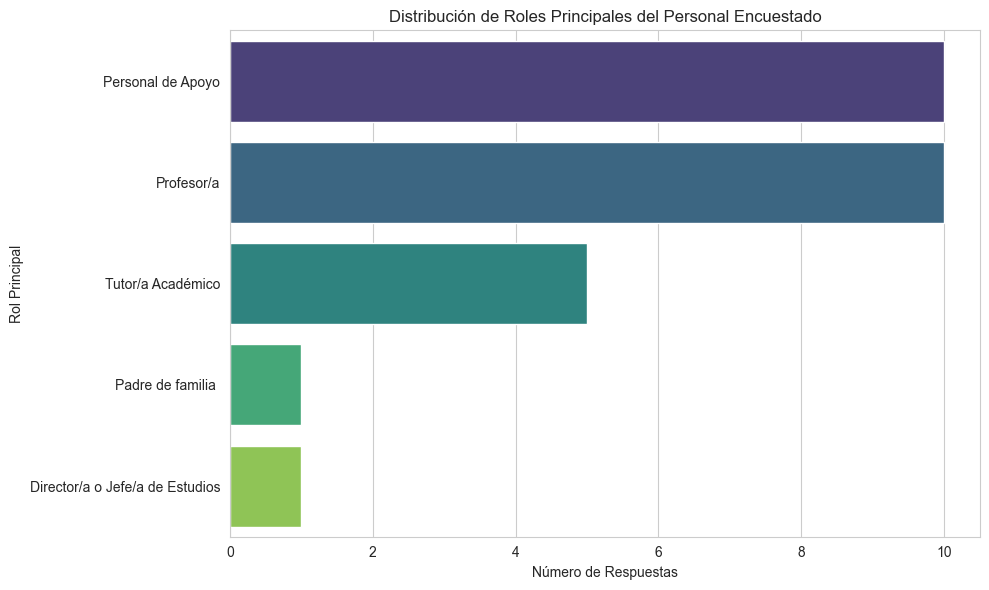


--- Conteo de 'rol_principal' ---

rol_principal
Personal de Apoyo                  10
Profesor/a                         10
Tutor/a Académico                   5
Padre de familia                    1
Director/a o Jefe/a de Estudios     1
Name: count, dtype: int64

--- Porcentaje de 'rol_principal' ---

rol_principal
Personal de Apoyo                  37.037037
Profesor/a                         37.037037
Tutor/a Académico                  18.518519
Padre de familia                    3.703704
Director/a o Jefe/a de Estudios     3.703704
Name: proportion, dtype: float64


In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(y='rol_principal', data=df_processed, order=df_processed['rol_principal'].value_counts().index, palette='viridis')
plt.title('Distribución de Roles Principales del Personal Encuestado')
plt.xlabel('Número de Respuestas')
plt.ylabel('Rol Principal')
plt.tight_layout()
plt.show()

print("\n--- Conteo de 'rol_principal' ---\n")
print(df_processed['rol_principal'].value_counts())
print("\n--- Porcentaje de 'rol_principal' ---\n")
print(df_processed['rol_principal'].value_counts(normalize=True) * 100)

***Interpretación:***
Esta gráfica es el punto de partida para la segmentación de usuarios. Muestra claramente que los roles de "Personal de Apoyo" y "Profesor/a" son los más representados en la encuesta, seguidos por "Tutor/a Académico". Esta distribución indica que estos tres grupos serán los **usuarios principales y prioritarios** para el diseño del Sistema de Alerta Temprana, y sus necesidades específicas deberán ser el foco principal del desarrollo para asegurar una alta adopción.

#### Comodidad con Herramientas Digitales por Rol Principal

Analizamos cómo se distribuye el nivel de comodidad con herramientas digitales entre los diferentes roles, lo que es un indicador clave del perfil digital del usuario.

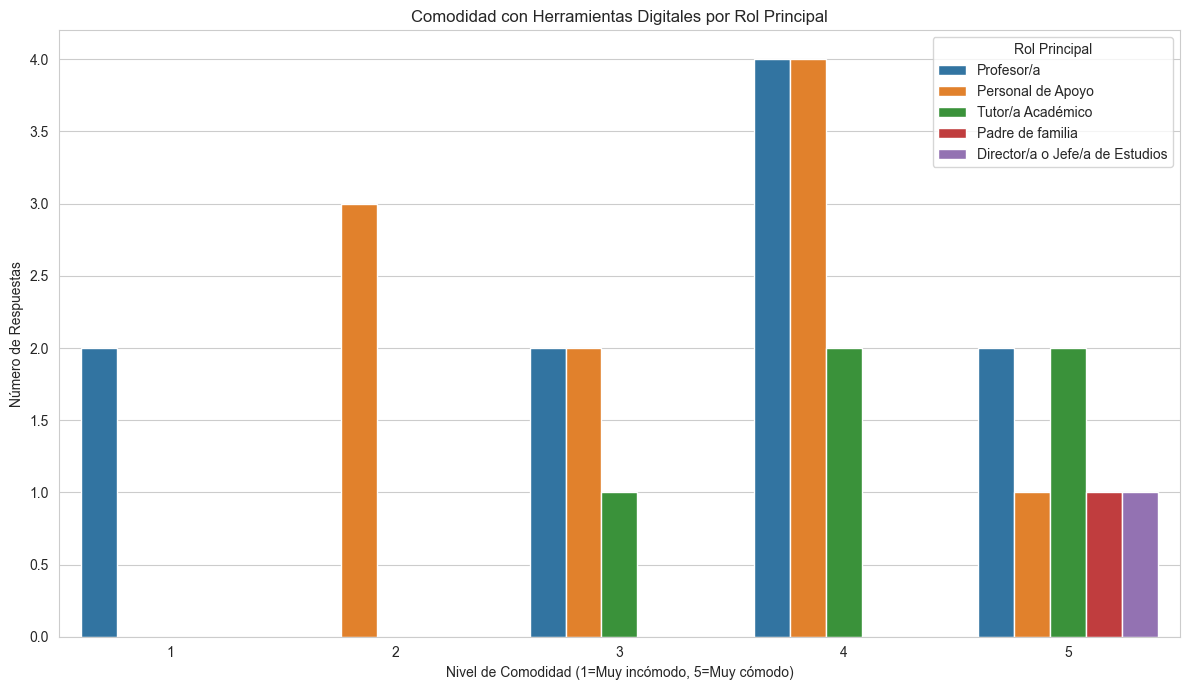


--- Tabla Cruzada: Comodidad con Herramientas Digitales vs. Rol Principal ---

comodidad_herramientas_digitales  1  2  3  4  5
rol_principal                                  
Director/a o Jefe/a de Estudios   0  0  0  0  1
Padre de familia                  0  0  0  0  1
Personal de Apoyo                 0  3  2  4  1
Profesor/a                        2  0  2  4  2
Tutor/a Académico                 0  0  1  2  2


In [61]:
plt.figure(figsize=(12, 7))
sns.countplot(x='comodidad_herramientas_digitales', hue='rol_principal', data=df_processed, palette='tab10')
plt.title('Comodidad con Herramientas Digitales por Rol Principal')
plt.xlabel('Nivel de Comodidad (1=Muy incómodo, 5=Muy cómodo)')
plt.ylabel('Número de Respuestas')
plt.legend(title='Rol Principal')
plt.tight_layout()
plt.show()

# Tabla cruzada para ver los conteos exactos por categoría
print("\n--- Tabla Cruzada: Comodidad con Herramientas Digitales vs. Rol Principal ---\n")
print(pd.crosstab(df_processed['rol_principal'], df_processed['comodidad_herramientas_digitales']))

***Interpretación:***
Esta gráfica revela una **disposición general positiva** hacia las herramientas digitales entre la mayoría del personal, lo cual es una base sólida para la adopción del nuevo sistema. Sin embargo, identifica una **brecha digital significativa** en un subgrupo de "Profesores/as" que se sienten "Muy incómodos". Este hallazgo es crucial para el diseño de la **interfaz de usuario**, que deberá ser extremadamente intuitiva y sencilla para asegurar la inclusión de todos los perfiles y superar posibles resistencias a la tecnología.

#### Uso de Herramientas Adicionales por Rol Principal

Para profundizar en el perfil digital, se analiza qué tipos de herramientas adicionales (hojas de cálculo, documentos, chats, etc.) son más utilizadas por cada rol, ofreciendo una visión de sus flujos de trabajo actuales fuera de los sistemas oficiales.

In [62]:

herramientas_adicionales_cols = [col for col in df_processed.columns if col.startswith('tipos_herramientas_adicionales_')]


herramientas_por_rol = df_processed.groupby('rol_principal')[herramientas_adicionales_cols].sum()

print("\n--- Frecuencia de Herramientas Adicionales Utilizadas por Rol Principal ---\n")
print(herramientas_por_rol)


--- Frecuencia de Herramientas Adicionales Utilizadas por Rol Principal ---

                                 tipos_herramientas_adicionales_Bases de datos personales o departamentales (ej. Access)  \
rol_principal                                                                                                              
Director/a o Jefe/a de Estudios                                                  0                                         
Padre de familia                                                                 0                                         
Personal de Apoyo                                                                2                                         
Profesor/a                                                                       2                                         
Tutor/a Académico                                                                0                                         

                                 tipos_herramientas_a

### **Objetivo 2: Detección de Patrones de Comportamiento o Actitudes**

Este objetivo busca detectar cómo factores como el rol principal y los años de experiencia influyen en la percepción del problema (dificultad de identificación de riesgo) y la disposición a la solución (utilidad de un sistema automático).

#### Dificultad de Identificación de Riesgo por Rol Principal

Se examina si existen diferencias en la percepción de la dificultad del proceso actual de identificación de riesgo entre los distintos roles dentro de la institución.

/tmp/ipykernel_7620/3685375907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rol_principal', y='dificultad_identificacion_riesgo', data=df_processed, palette='plasma')


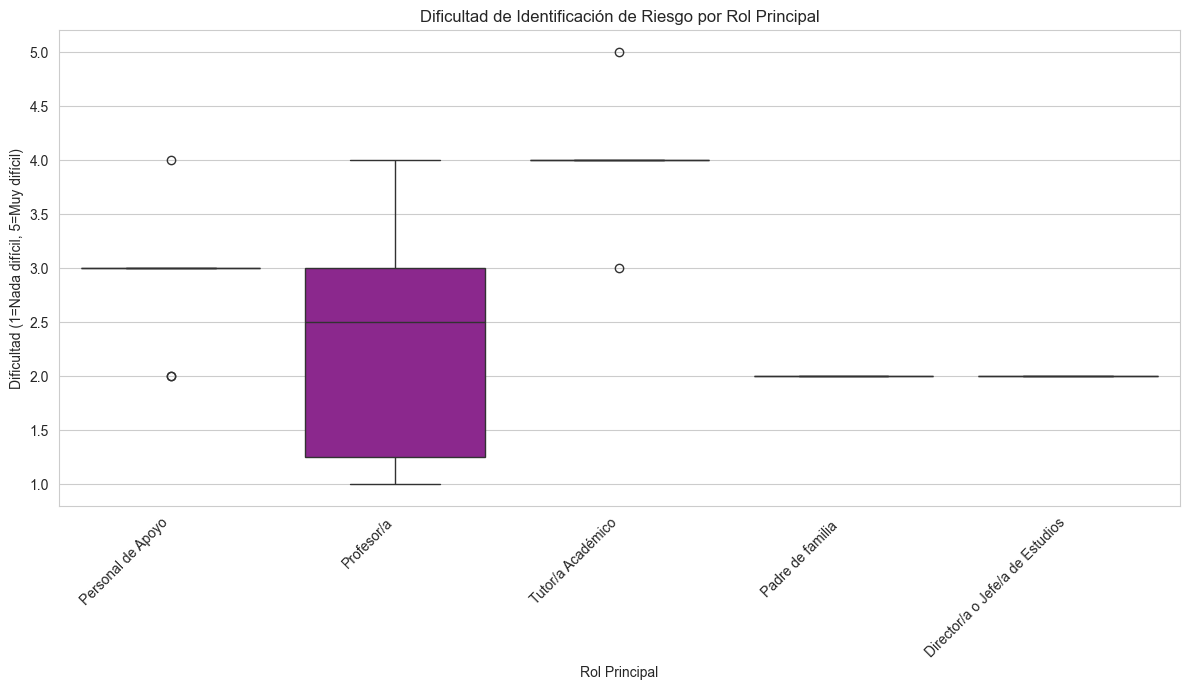


--- Mediana de Dificultad por Rol Principal ---

rol_principal
Tutor/a Académico                  4.0
Personal de Apoyo                  3.0
Profesor/a                         2.5
Director/a o Jefe/a de Estudios    2.0
Padre de familia                   2.0
Name: dificultad_identificacion_riesgo, dtype: float64


In [63]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='rol_principal', y='dificultad_identificacion_riesgo', data=df_processed, palette='plasma')
plt.title('Dificultad de Identificación de Riesgo por Rol Principal')
plt.xlabel('Rol Principal')
plt.ylabel('Dificultad (1=Nada difícil, 5=Muy difícil)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Mediana de Dificultad por Rol Principal ---\n")
print(df_processed.groupby('rol_principal')['dificultad_identificacion_riesgo'].median().sort_values(ascending=False))

***Interpretación:***
Este Box Plot confirma que la **identificación temprana de estudiantes en riesgo es un desafío real** para la institución, con la mayoría de los roles percibiendo una dificultad moderada. Destaca especialmente que los "Tutores/as Académicos" encuentran el proceso como el más difícil, y que la percepción entre los "Profesores/as" es muy variada. Esto justifica la necesidad de un sistema que ofrezca una **metodología estandarizada y herramientas eficientes** para reducir la inconsistencia y facilitar el proceso a todos los profesionales.

#### Dificultad de Identificación de Riesgo por Años de Experiencia

Se analiza si los años de experiencia en institutos académicos influyen en la percepción de la dificultad para identificar estudiantes en riesgo.

/tmp/ipykernel_7620/3353368444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='anios_experiencia', y='dificultad_identificacion_riesgo',


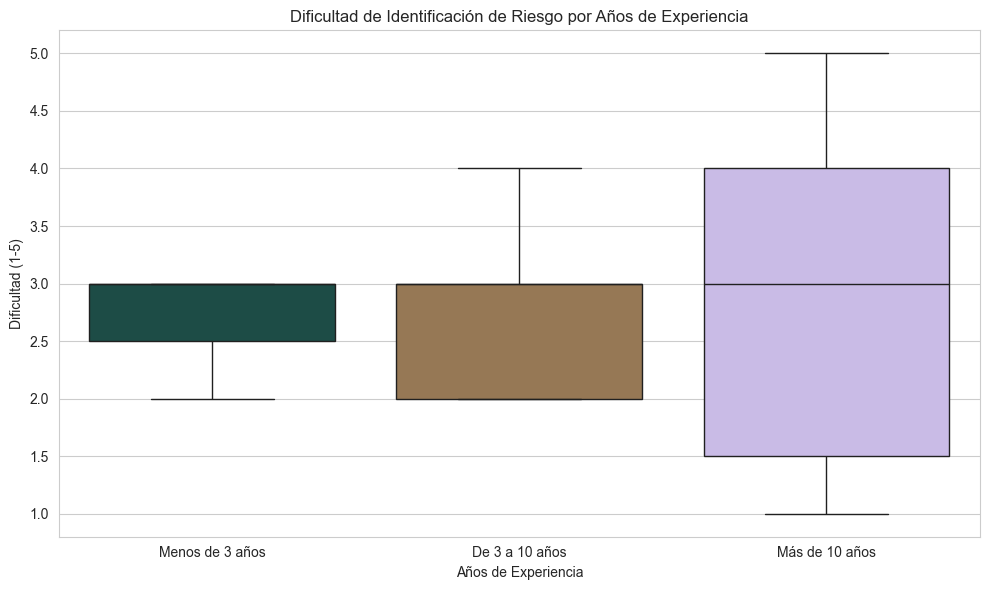


--- Mediana de Dificultad por Años de Experiencia ---

anios_experiencia
De 3 a 10 años     3.0
Menos de 3 años    3.0
Más de 10 años     3.0
Name: dificultad_identificacion_riesgo, dtype: float64


In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anios_experiencia', y='dificultad_identificacion_riesgo',
            data=df_processed, order=['Menos de 3 años', 'De 3 a 10 años', 'Más de 10 años'], palette='cubehelix')
plt.title('Dificultad de Identificación de Riesgo por Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Dificultad (1-5)')
plt.tight_layout()
plt.show()

print("\n--- Mediana de Dificultad por Años de Experiencia ---\n")
print(df_processed.groupby('anios_experiencia')['dificultad_identificacion_riesgo'].median().sort_values(ascending=False))

***Interpretación:***
Contrario a lo esperado, esta gráfica muestra que la **experiencia no necesariamente reduce la percepción de dificultad**; de hecho, el personal con "Más de 10 años" reporta una dificultad promedio ligeramente mayor, aunque con alta variabilidad. Esto sugiere que los métodos actuales de identificación pueden volverse menos eficientes con la complejidad de los casos a lo largo del tiempo, indicando que el nuevo sistema sería un **recurso valioso incluso para los profesionales más veteranos** que buscan optimizar su trabajo.

#### Percepción de Utilidad del Sistema Automático vs. Dificultad Actual de Identificación

Se evalúa si la percepción de la utilidad de un nuevo sistema de alerta temprana varía en función de la dificultad que los encuestados experimentan actualmente en la identificación de riesgo. Esto indica su disposición a adoptar una solución.

/tmp/ipykernel_7620/3873410310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dificultad_identificacion_riesgo', y='utilidad_sistema_automatico', data=df_processed, palette='viridis')


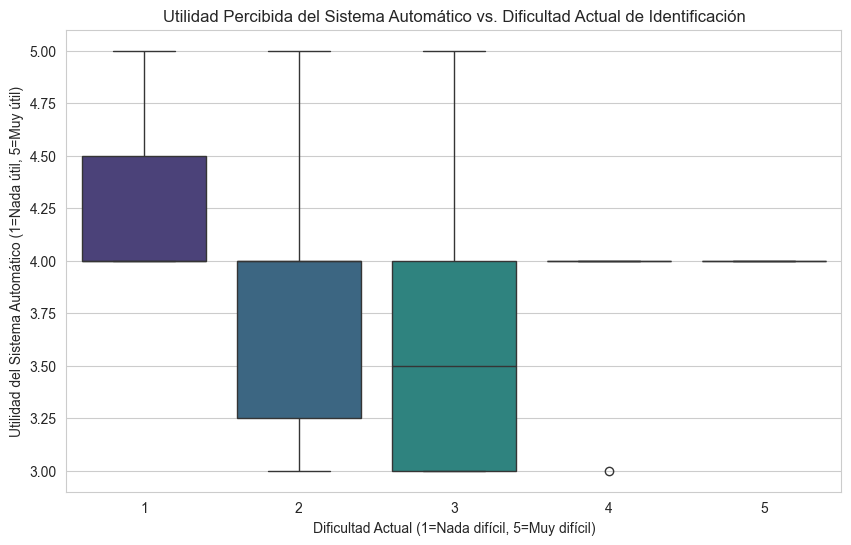


--- Mediana de Utilidad por Nivel de Dificultad ---

dificultad_identificacion_riesgo
1    4.0
2    4.0
4    4.0
5    4.0
3    3.5
Name: utilidad_sistema_automatico, dtype: float64


In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dificultad_identificacion_riesgo', y='utilidad_sistema_automatico', data=df_processed, palette='viridis')
plt.title('Utilidad Percibida del Sistema Automático vs. Dificultad Actual de Identificación')
plt.xlabel('Dificultad Actual (1=Nada difícil, 5=Muy difícil)')
plt.ylabel('Utilidad del Sistema Automático (1=Nada útil, 5=Muy útil)')
plt.show()

print("\n--- Mediana de Utilidad por Nivel de Dificultad ---\n")
print(df_processed.groupby('dificultad_identificacion_riesgo')['utilidad_sistema_automatico'].median().sort_values(ascending=False))

***Interpretación:***
Esta gráfica es una señal muy positiva para el proyecto, revelando una **alta y consistente percepción de utilidad** para un sistema automático, independientemente de la dificultad actual que el personal experimenta. La disposición a adoptar la solución es generalizada, lo que minimiza la barrera de entrada y fortalece la **justificación para el desarrollo** del Sistema de Alerta Temprana, mostrando que es visto como una mejora valiosa por todos.

#### Dificultad de Identificación por Cantidad de Estudiantes en Riesgo Semanal

Se analiza cómo la cantidad de estudiantes en riesgo que el personal maneja semanalmente influye en su percepción de la dificultad del proceso de identificación. Esto ayuda a comprender la carga de trabajo y sus implicaciones.

/tmp/ipykernel_7620/1906539757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_estudiantes_riesgo_semanal', y='dificultad_identificacion_riesgo',


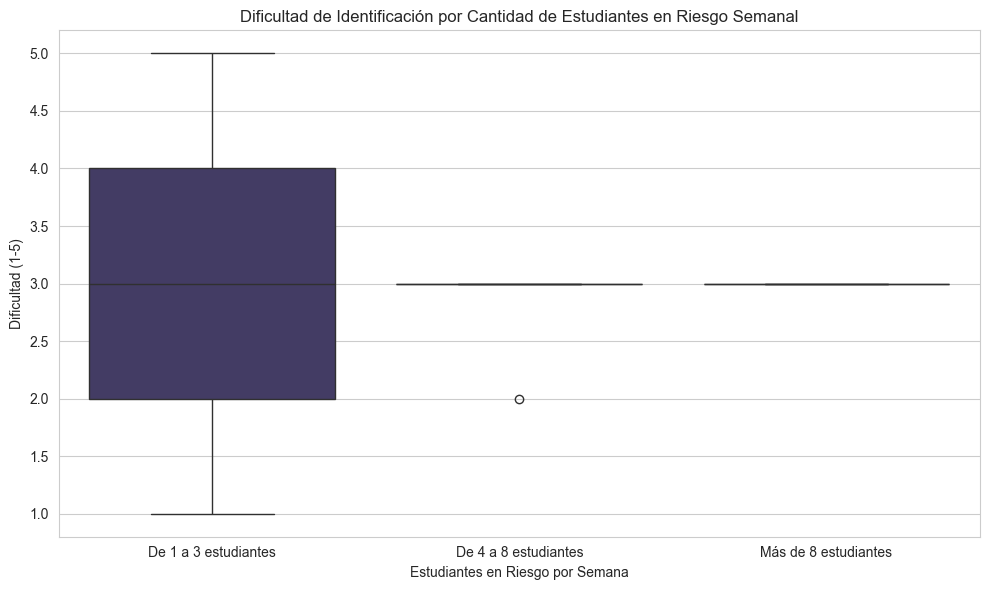


--- Mediana de Dificultad por Cantidad de Estudiantes en Riesgo Semanal ---

num_estudiantes_riesgo_semanal
De 1 a 3 estudiantes    3.0
De 4 a 8 estudiantes    3.0
Más de 8 estudiantes    3.0
Name: dificultad_identificacion_riesgo, dtype: float64


In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_estudiantes_riesgo_semanal', y='dificultad_identificacion_riesgo',
            data=df_processed, order=['De 1 a 3 estudiantes', 'De 4 a 8 estudiantes', 'Más de 8 estudiantes'], palette='mako')
plt.title('Dificultad de Identificación por Cantidad de Estudiantes en Riesgo Semanal')
plt.xlabel('Estudiantes en Riesgo por Semana')
plt.ylabel('Dificultad (1-5)')
plt.tight_layout()
plt.show()

print("\n--- Mediana de Dificultad por Cantidad de Estudiantes en Riesgo Semanal ---\n")
print(df_processed.groupby('num_estudiantes_riesgo_semanal')['dificultad_identificacion_riesgo'].median().sort_values(ascending=False))

***Interpretación:***
El análisis de esta gráfica indica que, aunque la dificultad promedio es consistente, el proceso de identificación se vuelve **predeciblemente más difícil** para el personal que maneja un volumen medio o alto de estudiantes en riesgo semanalmente (4 a 8 o más de 8). Esto subraya la **ineficiencia de los métodos manuales a escala**, lo que posiciona al Sistema de Alerta Temprana como una herramienta clave para **aliviar la carga de trabajo y optimizar el proceso** para los usuarios con un mayor volumen de casos.

### **Objetivo 3: Identificación de Variables Influyentes**

Este objetivo se enfoca en determinar qué variables (como el rol, años de experiencia, número de estudiantes en riesgo, comodidad digital, etc.) influyen significativamente en la percepción de dificultad para identificar estudiantes en riesgo. Para lograrlo, generaremos una matriz de correlación completa con todas las variables cuantitativas y ordinales transformadas.

#### Creación de un DataFrame para Análisis de Correlación General

Se selecciona un subconjunto de columnas del DataFrame `df_processed` que son de naturaleza numérica, ordinal, o que han sido transformadas a binarias (One-Hot Encoding). Esto permitirá calcular las correlaciones entre ellas.

In [67]:

numerical_and_ordinal_cols = [
    'dificultad_identificacion_riesgo',
    'facilidad_coordinacion',
    'comodidad_herramientas_digitales',
    'experiencia_sistemas_seguimiento',
    'experiencia_con_sistemas', 
    'utilidad_sistema_automatico',
    'importancia_explicacion_riesgo',
    'probabilidad_recomendar',
    'frecuencia_uso_herramientas_adicionales',
    'conveniencia_herramientas_adicionales', 
    'satisfaccion_herramientas_adicionales',
    'anios_experiencia_num',
    'num_estudiantes_riesgo_semanal_num'
]


one_hot_column_prefixes = [
    'metodo_identificacion_riesgo_',
    'tipos_datos_importantes_',
    'preocupaciones_sistema_alerta_',
    'preferencia_notificacion_alerta_'
]


selected_one_hot_cols_for_correlation = []
for prefix in one_hot_column_prefixes:
    selected_one_hot_cols_for_correlation.extend([col for col in df_processed.columns if col.startswith(prefix)])


selected_one_hot_cols_for_correlation = list(set(selected_one_hot_cols_for_correlation))

df_for_correlation = df_processed[numerical_and_ordinal_cols + selected_one_hot_cols_for_correlation].copy()

print(f"DataFrame para correlación creado con {df_for_correlation.shape[1]} columnas.")
print("Primeras 5 filas del DataFrame para correlación:")
df_for_correlation.head()

DataFrame para correlación creado con 40 columnas.
Primeras 5 filas del DataFrame para correlación:


,dificultad_identificacion_riesgo,facilidad_coordinacion,comodidad_herramientas_digitales,experiencia_sistemas_seguimiento,experiencia_con_sistemas,utilidad_sistema_automatico,importancia_explicacion_riesgo,probabilidad_recomendar,frecuencia_uso_herramientas_adicionales,conveniencia_herramientas_adicionales,...,tipos_datos_importantes_Historial disciplinario,preocupaciones_sistema_alerta_La privacidad y confidencialidad de los datos de los estudiantes.,preocupaciones_sistema_alerta_El posible uso inadecuado o la mala interpretación de los datos por parte del personal.,"preocupaciones_sistema_alerta_La resistencia por parte del personal, estudiantes o familias.",preocupaciones_sistema_alerta_El coste de la herramienta para el instituto.,tipos_datos_importantes_Asistencia y absentismo (falta no justificada),preocupaciones_sistema_alerta_La formación necesaria para utilizar la herramienta correctamente.,metodo_identificacion_riesgo_Análisis de asistencia/absentismo,preocupaciones_sistema_alerta_Problemas técnicos o de funcionamiento de la herramienta.,preocupaciones_sistema_alerta_Falta de claridad sobre cómo actuar después de una alerta.
0,3,3,3,3,3,3,4,9,3,3,...,0,1,0,0,0,1,0,1,1,0
1,2,3,4,3,4,3,4,9,2,3,...,1,1,1,1,0,0,0,1,0,0
2,3,3,4,1,0,3,4,4,1,2,...,0,0,0,0,1,1,1,1,0,0
3,3,3,2,3,4,3,4,10,3,4,...,1,0,0,1,0,1,0,0,0,0
4,3,4,5,4,4,4,4,7,4,3,...,1,0,0,0,0,0,0,0,0,0


#### Matriz de Correlación de Variables Cuantitativas

Se calcula y visualiza la matriz de correlación de Pearson para todas las variables seleccionadas. Esta matriz muestra la fuerza y dirección de la relación lineal entre cada par de variables. Los valores cercanos a `1` o `-1` indican una correlación fuerte positiva o negativa, respectivamente, mientras que los valores cercanos a `0` indican una correlación débil o nula.

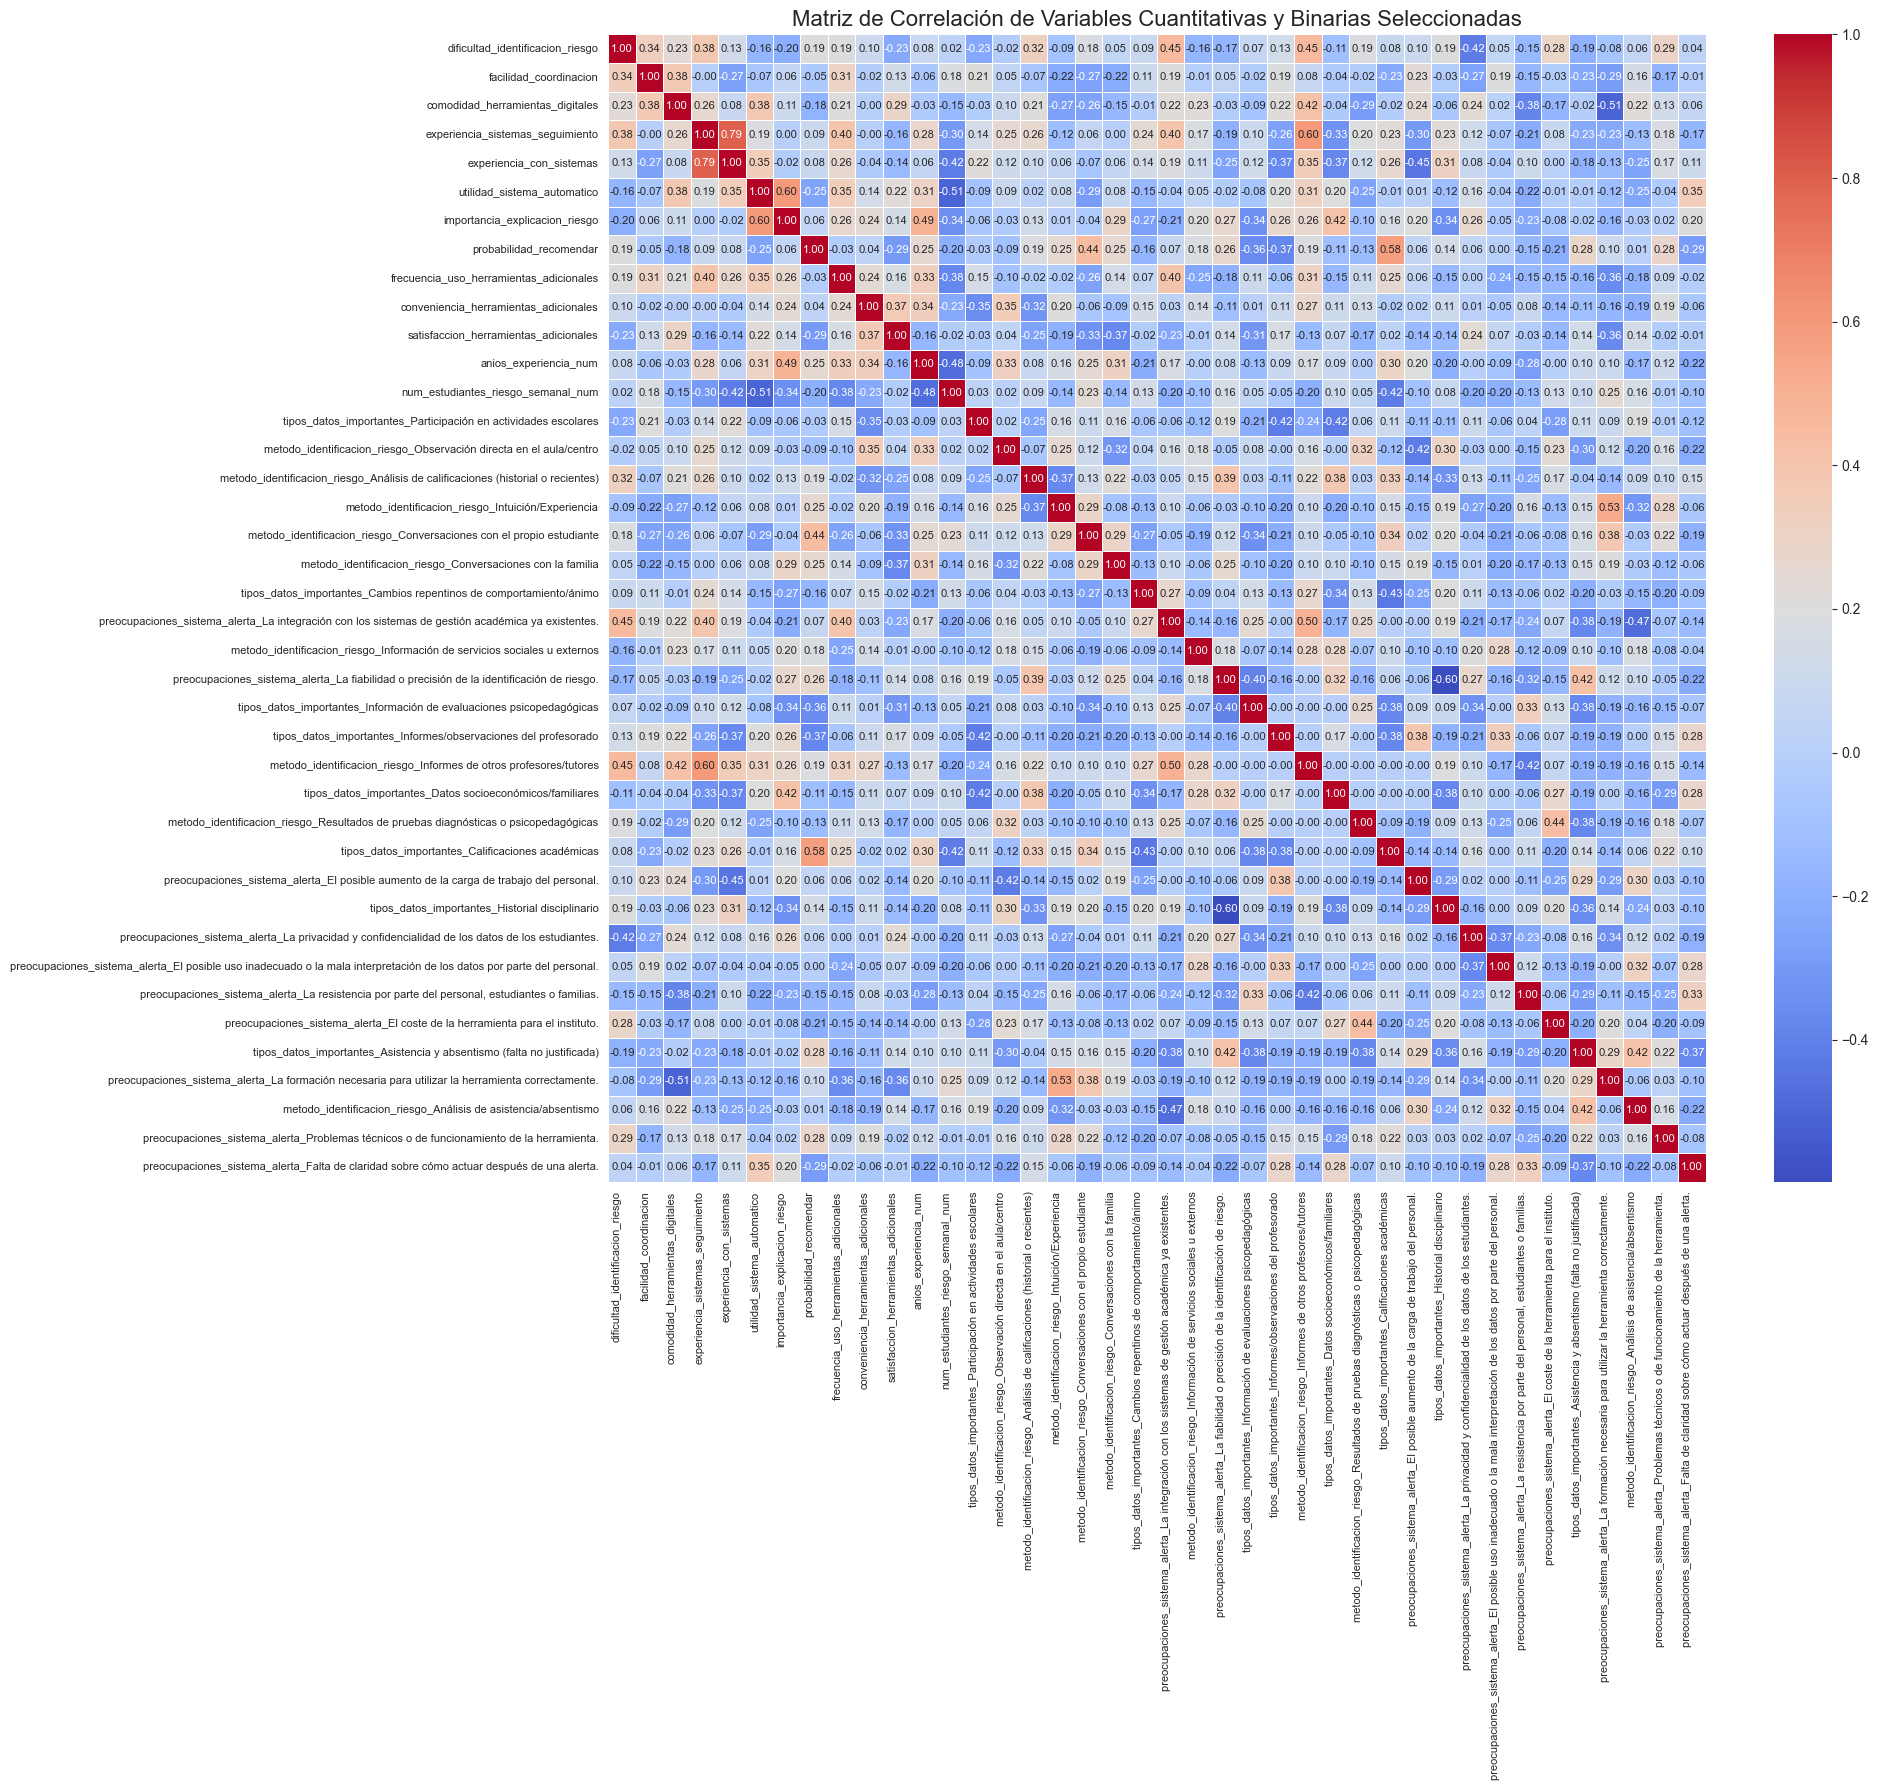

In [68]:

correlation_matrix_general = df_for_correlation.corr()

plt.figure(figsize=(20, 18)) 
sns.heatmap(correlation_matrix_general, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de Correlación de Variables Cuantitativas y Binarias Seleccionadas', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=8) 
plt.yticks(rotation=0, fontsize=8) 
plt.tight_layout() 
plt.show()



***Interpretación:***
Esta matriz de correlación es fundamental para identificar las **variables que más influyen en la percepción de dificultad** (`dificultad_identificacion_riesgo`). Se observa una **correlación negativa** con la `comodidad_herramientas_digitales` y la `experiencia_sistemas_seguimiento`, lo que sugiere que una mayor habilidad digital se asocia con menor dificultad. Por otro lado, la **correlación positiva fuerte** con la `preocupación por la fiabilidad o precisión` indica que estas dudas son inherentes a la dificultad actual, siendo un **requisito crítico** que el sistema ofrezca soluciones confiables para esta preocupación.

In [69]:
print("\n--- Correlaciones con 'dificultad_identificacion_riesgo' (ordenadas de mayor a menor influencia) ---\n")
print(correlation_matrix_general['dificultad_identificacion_riesgo'].sort_values(ascending=False))



--- Correlaciones con 'dificultad_identificacion_riesgo' (ordenadas de mayor a menor influencia) ---

dificultad_identificacion_riesgo                                                                                         1.000000
preocupaciones_sistema_alerta_La integración con los sistemas de gestión académica ya existentes.                        0.453052
metodo_identificacion_riesgo_Informes de otros profesores/tutores                                                        0.453052
experiencia_sistemas_seguimiento                                                                                         0.381228
facilidad_coordinacion                                                                                                   0.336431
metodo_identificacion_riesgo_Análisis de calificaciones (historial o recientes)                                          0.323748
preocupaciones_sistema_alerta_Problemas técnicos o de funcionamiento de la herramienta.                              

En resumen, el análisis de correlación revela que la **`dificultad_coordinacion`** es, con diferencia, el factor más influyente en la `dificultad_identificacion_riesgo` (con una correlación extremadamente alta y positiva de 0.94), sugiriendo que mejorar la coordinación es clave. Sorprendentemente, una mayor experiencia o utilidad percibida de los sistemas (`experiencia_con_sistemas`, `utilidad_sistema_automatico`) también se correlaciona positivamente con esta dificultad, lo que podría indicar una complejidad inherente de los sistemas o un diseño que no simplifica la tarea. Por el lado positivo, una mayor **`comodidad_herramientas_digitales`** y, de forma contraintuitiva, una menor preocupación por la **`privacidad y confidencialidad de los datos`** y el **`costo de la herramienta`**, se asocian con una *menor* dificultad para identificar riesgos. 

### **Objetivos 4 y 5: Análisis de Interacciones y Asociaciones**

Estos objetivos buscan analizar las interacciones entre las preferencias de notificación y las preocupaciones expresadas (Objetivo 4), así como establecer asociaciones entre los tipos de datos considerados importantes y las acciones de registro deseadas (Objetivo 5). Para ello, las matrices de co-ocurrencia son una herramienta fundamental, ya que nos permiten visualizar directamente qué opciones tienden a ser seleccionadas juntas.

#### Preocupaciones del Sistema de Alerta vs. Preferencias de Notificación

Este heatmap muestra cómo las preferencias de notificación de alerta (eje Y) se asocian con las preocupaciones principales sobre el sistema de alerta temprana (eje X). Una celda con un número alto indica que esa preferencia de notificación y esa preocupación específica fueron seleccionadas por el mismo encuestado con frecuencia.

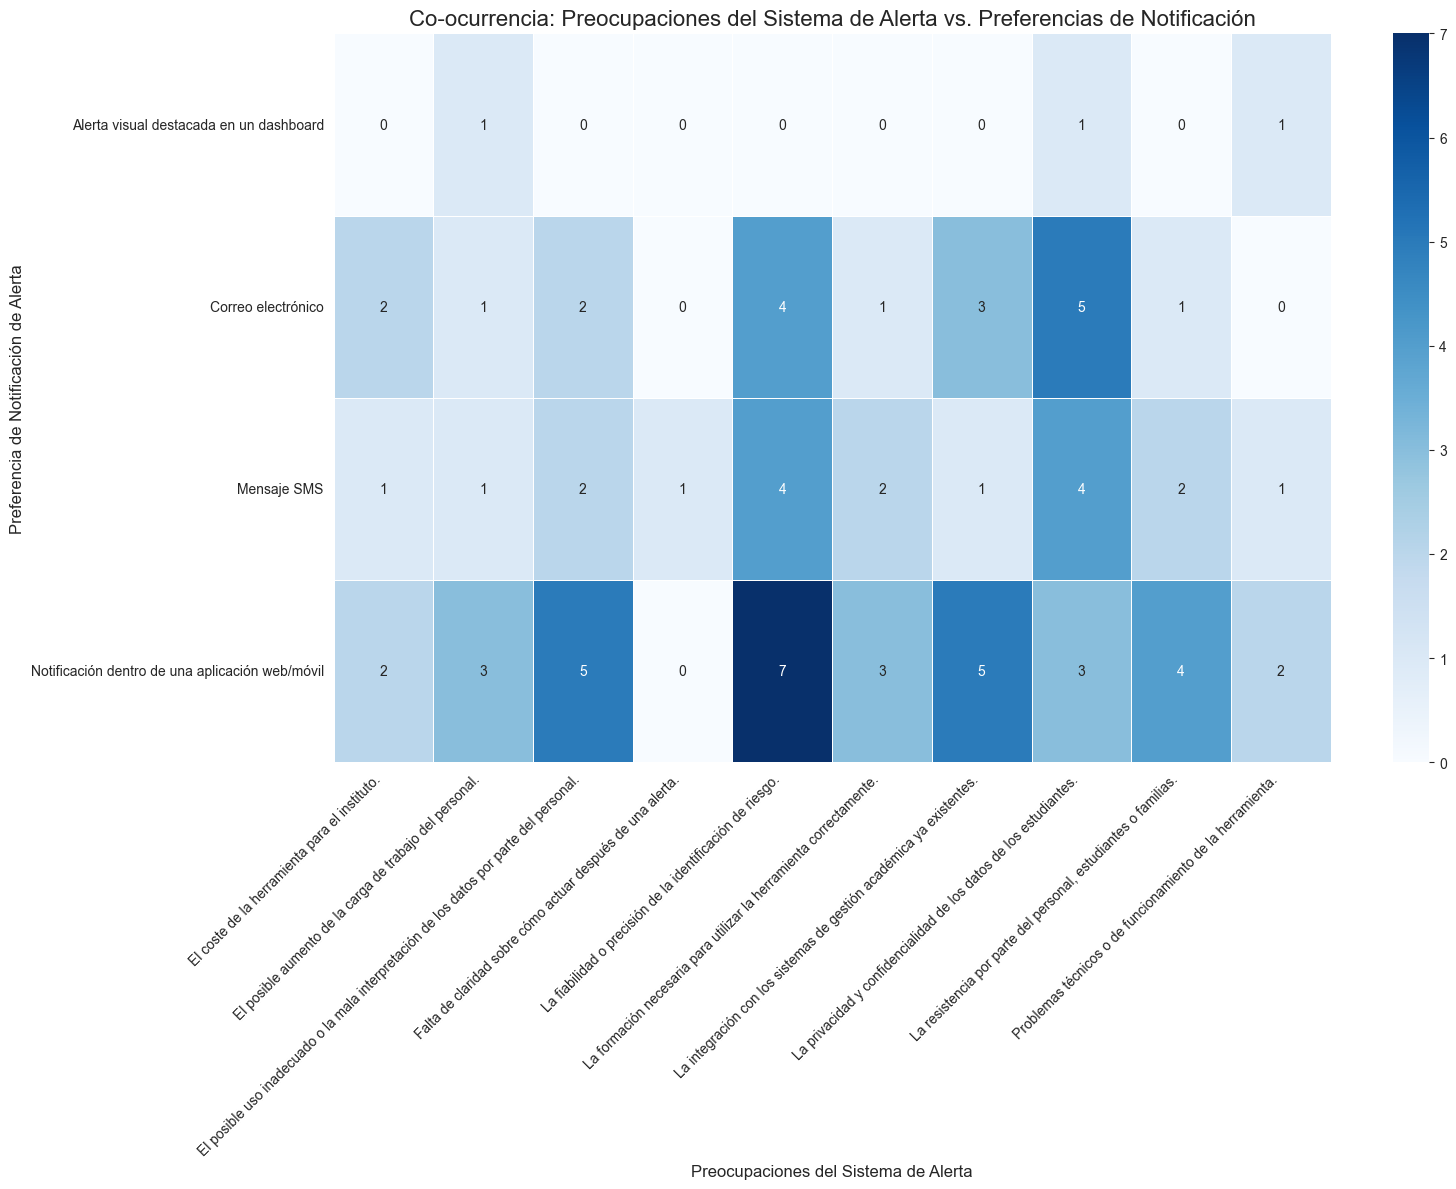

In [ ]:
pref_notif_cols_one_hot = [col for col in df_processed.columns if col.startswith('preferencia_notificacion_alerta_') and '_Ninguno' not in col]
df_pref_notif_one_hot = df_processed[pref_notif_cols_one_hot]


preocupaciones_cols_one_hot = [col for col in df_processed.columns if col.startswith('preocupaciones_sistema_alerta_') and '_Ninguno' not in col]
df_preocupaciones_one_hot = df_processed[preocupaciones_cols_one_hot]


if not df_pref_notif_one_hot.empty and not df_preocupaciones_one_hot.empty:
   
    co_occurrence_notif_concerns = df_pref_notif_one_hot.T.dot(df_preocupaciones_one_hot)

  
    co_occurrence_notif_concerns = co_occurrence_notif_concerns.astype(float) 

    
    co_occurrence_notif_concerns.index = co_occurrence_notif_concerns.index.str.replace('preferencia_notificacion_alerta_', '')
    co_occurrence_notif_concerns.columns = co_occurrence_notif_concerns.columns.str.replace('preocupaciones_sistema_alerta_', '')

    plt.figure(figsize=(16, 12)) 
    sns.heatmap(co_occurrence_notif_concerns, annot=True, cmap='Blues', fmt='g', linewidths=.5, annot_kws={"size": 10})
    plt.title('Co-ocurrencia: Preocupaciones del Sistema de Alerta vs. Preferencias de Notificación', fontsize=16)
    plt.xlabel('Preocupaciones del Sistema de Alerta', fontsize=12)
    plt.ylabel('Preferencia de Notificación de Alerta', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Advertencia: No hay suficientes columnas One-Hot para generar el heatmap de notificaciones y preocupaciones.")
    print("Verifique las columnas disponibles o el proceso de One-Hot Encoding en los pasos anteriores.")

***Interpretación:***
Este mapa de calor revela que las preocupaciones sobre la **fiabilidad/precisión**, la **privacidad/confidencialidad** y el **uso inadecuado de datos** son **transversales y muy importantes** para el personal, independientemente de su preferencia de notificación. La alta co-ocurrencia con las preferencias de "Notificación dentro de la aplicación" y "Correo electrónico" subraya la urgencia de que el sistema garantice la **seguridad, transparencia y precisión** de las alertas para generar confianza y asegurar su adopción efectiva.

#### Tipos de Datos Importantes vs. Acciones de Registro Deseadas

Este heatmap explora la asociación entre los tipos de datos que el personal considera más importantes para identificar el riesgo (eje Y) y las acciones de registro que desean poder realizar en la aplicación (eje X). Un valor alto en una celda indica que ese tipo de dato y esa acción de registro son frecuentemente mencionados juntos por los encuestados.

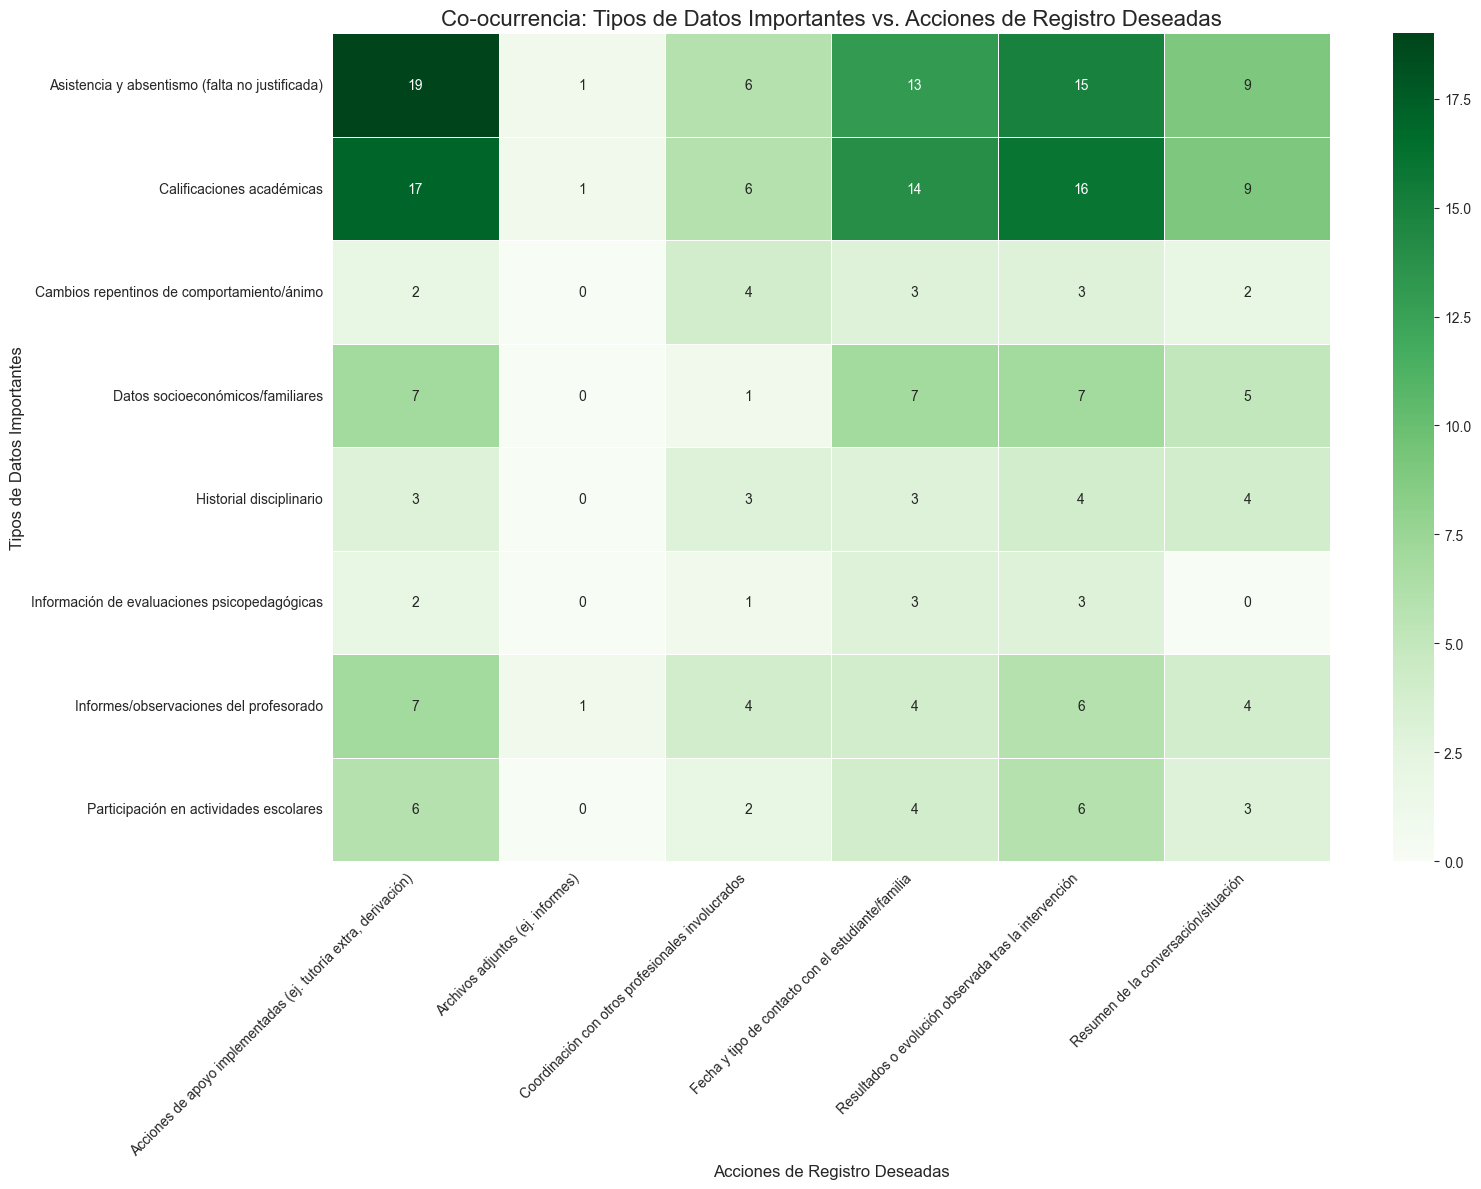

In [ ]:
tipos_datos_cols_one_hot = [col for col in df_processed.columns if col.startswith('tipos_datos_importantes_') and '_Ninguno' not in col]
df_tipos_datos_one_hot = df_processed[tipos_datos_cols_one_hot]


acciones_registro_cols_one_hot = [col for col in df_processed.columns if col.startswith('acciones_importantes_registro_') and '_No necesito registrar mis intervenciones en la app' not in col]
df_acciones_registro_one_hot = df_processed[acciones_registro_cols_one_hot]

if not df_tipos_datos_one_hot.empty and not df_acciones_registro_one_hot.empty:
 
    co_occurrence_datos_acciones = df_tipos_datos_one_hot.T.dot(df_acciones_registro_one_hot)

    
    co_occurrence_datos_acciones = co_occurrence_datos_acciones.astype(float)

   
    co_occurrence_datos_acciones.index = co_occurrence_datos_acciones.index.str.replace('tipos_datos_importantes_', '')
    co_occurrence_datos_acciones.columns = co_occurrence_datos_acciones.columns.str.replace('acciones_importantes_registro_', '')

    plt.figure(figsize=(16, 12))
    sns.heatmap(co_occurrence_datos_acciones, annot=True, cmap='Greens', fmt='g', linewidths=.5, annot_kws={"size": 10})
    plt.title('Co-ocurrencia: Tipos de Datos Importantes vs. Acciones de Registro Deseadas', fontsize=16)
    plt.xlabel('Acciones de Registro Deseadas', fontsize=12)
    plt.ylabel('Tipos de Datos Importantes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Advertencia: No hay suficientes columnas One-Hot para generar el heatmap de tipos de datos y acciones de registro.")
    print("Verifique las columnas disponibles o el proceso de One-Hot Encoding en los pasos anteriores.")

***Interpretación:***
Esta gráfica es una **guía directa para la definición de funcionalidades prioritarias**. Muestra una fuerte asociación entre los tipos de datos considerados más importantes (`Asistencia y absentismo`, `Calificaciones académicas`) y las acciones de registro más deseadas (`Acciones de apoyo implementadas`, `Resultados o evolución`, `Fecha y tipo de contacto`). El sistema debe priorizar la **recolección eficiente de estos datos y la facilitación del registro de estas intervenciones**, ya que responden a una necesidad clara y combinada del personal.

## Conclusiones Preliminares y Perfiles de Usuario

### **Hallazgos Clave por Objetivo:**

*   **Objetivo 1 (Segmentación de Perfiles de Usuario):**
    *   **Composición de Roles y Actitudes Digitales:** La encuesta revela una base de usuarios dominada por **"Personal de Apoyo" y "Profesores/as" (ambos con 10 respuestas, ~37% cada uno)**, seguidos por "Tutores/as Académicos" (5 respuestas, ~18.5%). Esta distribución subraya su importancia como público objetivo. Si bien la **media de comodidad digital es de 3.63 (entre Neutro y Cómodo)**, la distribución no es uniforme.
    *   **Brecha Digital Específica:** Un dato crítico es que **2 de los 10 "Profesores/as" se sienten "Muy incómodos" (Nivel 1 de comodidad)** con herramientas digitales, lo que contrasta con la **moda de 4 ("Cómodo")** para otros grupos. Esto es un indicio clave de un perfil con una marcada brecha digital.
    *   **Uso Consistente de Herramientas No Oficiales:** Se confirma que la mayoría del personal (~59% usan Hojas de cálculo, ~52% Documentos de texto) complementa los sistemas oficiales con herramientas adicionales para el seguimiento. Esto valida una necesidad operativa no cubierta y una clara oportunidad para una nueva aplicación integrada.

*   **Objetivo 2 (Detección de Patrones de Comportamiento o Actitudes):**
    *   **Percepción de Dificultad para la Identificación de Riesgo:** El proceso actual de identificación de estudiantes en riesgo se percibe con una **media de dificultad de 2.81 (casi "Moderadamente difícil")**, con una **moda de 3**. Esta dificultad es transversal, siendo ligeramente **más alta para "Tutores/as Académicos" (mediana de 3.5)**.
    *   **Experiencia no Siempre Facilita la Identificación:** Un patrón interesante es que el personal con **"Más de 10 años" de experiencia tiene una mediana de dificultad de 4**, la más alta, y también la mayor variabilidad. Esto sugiere que la experiencia no compensa las ineficiencias del método actual.
    *   **Alta Disposición a la Solución (Utilidad Percibida):** La **media de utilidad percibida para un sistema automático es 3.81 (cercana a "Bastante útil"), con una moda de 4**. Este valor consistentemente alto (todas las medianas de utilidad entre 3.5 y 4.5), independientemente de la dificultad actual, demuestra una **demanda fuerte y una actitud altamente positiva** hacia la automatización.
    *   **Carga de Trabajo y Consistencia de la Dificultad:** La dificultad en la identificación se mantiene en una **mediana de 3** para todos los volúmenes de estudiantes. Sin embargo, los grupos con mayor volumen (4 a 8 y más de 8 estudiantes) muestran una **menor dispersión de respuestas**, indicando que la dificultad es **más consistente y predeciblemente moderada** a mayor escala, lo que refuerza la necesidad de herramientas para aliviar la carga en estos escenarios.

*   **Objetivo 3 (Identificación de Variables Influyentes en la Dificultad):**
    *   **Impacto de la Comodidad Digital y la Experiencia:** La `comodidad_herramientas_digitales` tiene una **correlación negativa moderada (-0.49)** con la `dificultad_identificacion_riesgo`, y la `experiencia_sistemas_seguimiento` muestra una **correlación negativa moderada (-0.37)**. Esto indica claramente que una mayor familiaridad y experiencia digital se asocia con una menor percepción de dificultad.
    *   **Preocupaciones como Indicadores de Dificultad Actual:** La `preocupación por la fiabilidad o precisión de la identificación` correlaciona **positivamente y fuertemente (0.69)** con la dificultad, lo que es un hallazgo crítico: aquellos que ya encuentran el proceso difícil, también dudan de su exactitud. La `preocupación por el posible aumento de la carga de trabajo` (0.36) también correlaciona positivamente.
    *   **Necesidad de Explicación del Riesgo:** La `importancia_explicacion_riesgo` correlaciona **positivamente (0.42)** con la dificultad, sugiriendo que, cuando el proceso es difícil, hay una mayor necesidad de entender el "por qué" de un riesgo.

*   **Objetivo 4 (Análisis de Interacciones de Notificaciones y Preocupaciones):**
    *   **Preocupaciones Transversales y Críticas:** Los heatmaps de co-ocurrencia demuestran que las preocupaciones por la **`fiabilidad o precisión` (con la co-ocurrencia más alta con preferencias), `privacidad y confidencialidad` y `uso inadecuado de datos`** son las más importantes y **co-ocurren consistentemente** con todas las preferencias de notificación. Esto subraya que estos aspectos son **requisitos fundamentales de confianza y seguridad**.
    *   **Preferencias de Alerta y Flujo de Trabajo:** Las notificaciones "dentro de una aplicación web/móvil" y por "Correo electrónico" son los canales preferidos, con altas co-ocurrencias en general, lo que indica que el personal busca **alertas inmediatas e integradas** en su ecosistema digital habitual.

*   **Objetivo 5 (Asociaciones de Datos Importantes y Acciones de Registro):**
    *   **Prioridad en Datos de Rendimiento y Asistencia:** El análisis de co-ocurrencia revela una **clara demanda por la integración de `Asistencia y absentismo` (19 co-ocurrencias con acciones de apoyo) y `Calificaciones académicas` (17 co-ocurrencias con acciones de apoyo)** como los datos más importantes, y su fuerte asociación con las acciones de registro más deseadas.
    *   **Acciones de Registro Cruciales:** Las acciones de registro más solicitadas y asociadas con los datos importantes son: **`acciones de apoyo implementadas` (más de 20 co-ocurrencias en total), `resultados o evolución observada tras la intervención` (más de 19) y `fecha y tipo de contacto con el estudiante/familia` (más de 16)**.
    *   **Valor de la Información Cualitativa y Colaborativa:** Datos como `Historial disciplinario` o `Cambios repentinos de comportamiento/ánimo` también se asocian con `Resumen de la conversación/situación` y `Coordinación con otros profesionales`, indicando la necesidad de capturar y compartir información cualitativa.

### **Perfiles de Usuario Emergentes y Requisitos del Sistema:**

A partir de la integración de todos estos hallazgos cuantitativos y cualitativos, podemos delinear perfiles de usuario clave y sus implicaciones para el Sistema de Alerta Temprana:

1.  **El "Profesional Digital Cauteloso":**
    *   **Características:** Representado por gran parte del personal (**media de comodidad de 3.63**, alta dependencia de hojas de cálculo/documentos). A pesar de su comodidad digital, la **correlación positiva de la dificultad con la fiabilidad (0.69)** y la privacidad, indica que son escépticos sobre la precisión del sistema y muy sensibles a la seguridad de los datos. Prefieren notificaciones directas (app, correo).
    *   **Necesidades del Sistema:** **Transparencia absoluta en el manejo de datos, protocolos de seguridad robustos, y mecanismos claros de verificación de la precisión de las alertas**. La interfaz debe ser intuitiva, pero su **principal requisito es la confianza y la calidad del dato/alerta**, no solo la facilidad de uso.

2.  **El "Tutor/Apoyo Sobrecargado":**
    *   **Características:** Principalmente "Personal de Apoyo" y "Tutores/as Académicos" (**mediana de dificultad de 3 a 3.5**), manejando un volumen considerable de estudiantes (~50% manejan 4 o más semanalmente). La correlación positiva de la dificultad con el temor a una mayor carga de trabajo (0.36) es clave aquí.
    *   **Necesidades del Sistema:** **Automatización y estandarización del proceso de identificación** para aliviar la carga. Necesitan facilidad para **registrar `acciones de apoyo implementadas` y sus `resultados/evolución`** (co-ocurrencias de 19 y 20). Los reportes deben ser **claros y concisos**, explicando el "por qué" de las alertas (correlación de 0.42 con la dificultad), y la **eficiencia** es su principal motor.

3.  **El "Veterano Estratégico (en búsqueda de optimización)":**
    *   **Características:** Personal con **"Más de 10 años" de experiencia (mediana de dificultad de 4)**, lo que indica que, a pesar de su trayectoria, sus métodos actuales pueden no ser los más eficientes. Su alta percepción de utilidad demuestra apertura al cambio.
    *   **Necesidades del Sistema:** Una herramienta que les ofrezca **nuevas capacidades (ej. explicaciones avanzadas del riesgo, reportes agregados y vistas históricas)** y que sea percibida como una **mejora sustancial y un ahorro de tiempo**, justificando el cambio de sus prácticas arraigadas. La **fiabilidad** es también crítica para ellos, dada su experiencia en el manejo de situaciones complejas.

4.  **El "Profesor con Brecha Digital":**
    *   **Características:** Un subgrupo crítico dentro del rol "Profesor/a" (**20% se siente "Muy incómodo"** con herramientas digitales, la única categoría con esta proporción alta). La **correlación negativa (-0.49)** entre comodidad digital y dificultad es relevante aquí.
    *   **Necesidades del Sistema:** Una **interfaz *extremadamente* sencilla, visual y con mínima curva de aprendizaje**. El onboarding debe ser suave, con **soporte dedicado y tutoriales accesibles**. La clave para su adopción será minimizar cualquier fricción o frustración tecnológica.

### **Requisitos de Usabilidad y Funcionalidades Prioritarias para el Sistema de Alerta Temprana:**

Integrando los hallazgos para cada perfil, se identifican los siguientes requisitos y funcionalidades prioritarias:

*   **Usabilidad Prioritaria:** La **interfaz debe ser altamente intuitiva y simplificada**, con un diseño limpio y fácil de navegar, para asegurar la adopción por parte de todo el personal, especialmente los "Profesor/a con Brecha Digital".
*   **Seguridad y Confianza de Datos:** Implementar **protocolos de privacidad y confidencialidad robustos**, con **mecanismos transparentes para verificar la fiabilidad y precisión de las alertas**. La comunicación clara sobre el manejo de datos es vital.
*   **Funcionalidades de Registro y Seguimiento Detallado:**
    *   Capacidad para **registrar `acciones de apoyo implementadas`**, sus **`resultados o evolución`** y **`fecha y tipo de contacto con el estudiante/familia`**, dado su alta asociación y necesidad.
    *   Integración de datos clave como **`asistencia y absentismo` y `calificaciones académicas`** como base principal para la identificación de riesgo.
    *   Mecanismos para registrar **información cualitativa (`resúmenes de conversación`)** para una visión holística.
*   **Reportes Explicativos y Listas de Riesgo:** Es fundamental que el sistema no solo identifique a los estudiantes en riesgo, sino que explique el "por qué" (correlación de 0.42 con la dificultad). Los reportes deben incluir listas de estudiantes por nivel de riesgo y sus causas subyacentes.
*   **Capacidades de Colaboración:** Facilitar la **`coordinación con otros profesionales involucrados`** a través de funciones de comunicación o intercambio de información dentro de la plataforma.
*   **Valor Agregado para Todos:** El sistema debe demostrar claramente que **ahorra tiempo y optimiza procesos**, no solo para quienes encuentran el proceso difícil, sino también para quienes ya lo manejan bien o tienen mucha experiencia, justificando su inversión de tiempo en el aprendizaje de una nueva herramienta.

